In [25]:
using CUDA, Random, Printf, DelimitedFiles, CairoMakie
using LinearAlgebra: mul!, ldiv!
using MAT
include("../utils/Tools.jl")
using .Toolbox

using FourierFlows
using Statistics
parsevalsum2 = FourierFlows.parsevalsum2

parsevalsum2 (generic function with 2 methods)

### Open .txt and read timeseries


In [ ]:
Run = ["RUNTEST"];
Dir = "../";


In [ ]:
time = Float64[]
KEh = Float64[]
D = Float64[]
LSD = Float64[]
SSD = Float64[]
taums = Float64[]
inject = Float64[]

# Loop over Runs
for jj in 1:length(Run)
    DIR = readdir(joinpath(Dir, Run[jj]), join=true)
    S = readdlm(joinpath(Dir, Run[jj], "ref_energy_bal.txt"))

    # if jj > 1
    #     tmin = S[1, 1]
    #     ni = dichotomy(time, tmin)
    #     time = time[1:ni]
    #     D = D[1:ni]
    #     KEh = KEh[1:ni]
    #     LSD = LSD[1:ni]
    #     inject = inject[1:ni]
    #     taums = taums[1:ni]
    #     SSD = SSD[1:ni]
    # end
    time = S[:, 1]'
    D = S[:, 9]'
    KEh = S[:, 2]'
    
    inject = S[:, 4]'
    SSD = S[:, 5]'
    LSD = S[:, 6]'

    # NameRun = String(Runs[jj])

    # if endswith(NameRun, "h") 
    #     for file in DIR
    #         FileName = basename(file)
    #         if length(FileName) > 10 && startswith(FileName, "spectrum_0")
    #             println("We open $FileName for run $NameRun")
    #             # Assume spectrum data has variables lkmoy and rSpecveloc
    #             spectrum_data = readdlm(file)
    #             # Assign lkmoy and rSpecveloc from file contents
    #             # You need to adjust based on the file structure
    #             lkmoy, rSpecveloc = spectrum_data[:, 1], spectrum_data[:, 2:end]
    #             k = vcat(k, lkmoy)
    #             Sp = vcat(Sp, rSpecveloc)
    #         end
    #     end
    # end
end

# Save data
#namesave = "output_data.jld2"  # Change as needed
#using JLD2
#@save namesave time KEh LSD SSD inject D taums


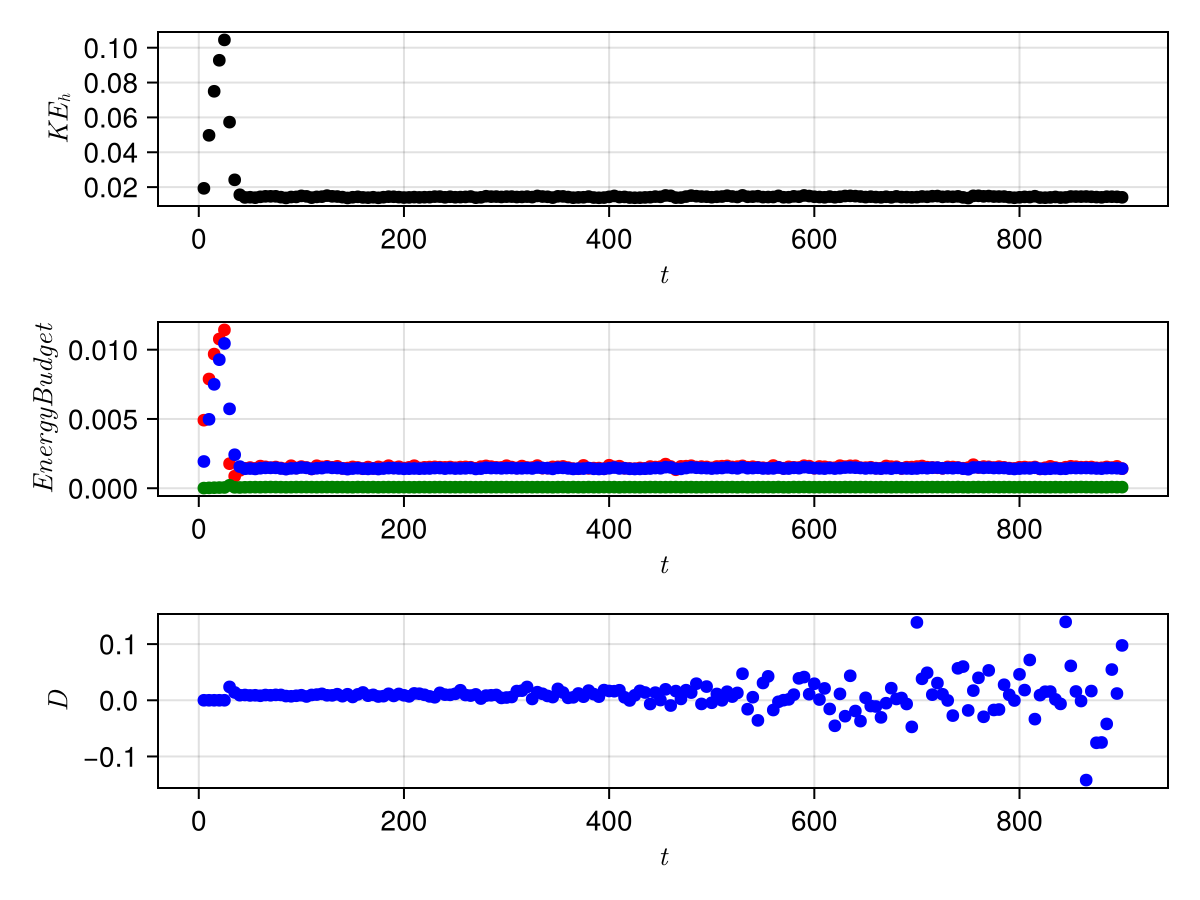

CairoMakie.Screen{IMAGE}


In [22]:
# Plot results

fig = Figure()
ax1 = Axis(fig[1, 1], 
xlabel = L"$t$", 
ylabel = L"$KE_h$")

plot!(ax1, Array(vec(time)), Array(vec(KEh)), color="black")

ax2 = Axis(fig[2, 1], 
xlabel = L"$t$", 
ylabel = L"Energy Budget")
plot!(ax2, Array(vec(time)), Array(vec(inject)), color="red")
plot!(ax2, Array(vec(time)), Array(vec(LSD)), color="blue")
plot!(ax2, Array(vec(time)), Array(vec(SSD)), color="green")
ax3 = Axis(fig[3, 1], 
xlabel = L"$t$", 
ylabel = L"$D$")
plot!(ax3, Array(vec(time)), Array(vec(D)), color="blue")

display(fig)




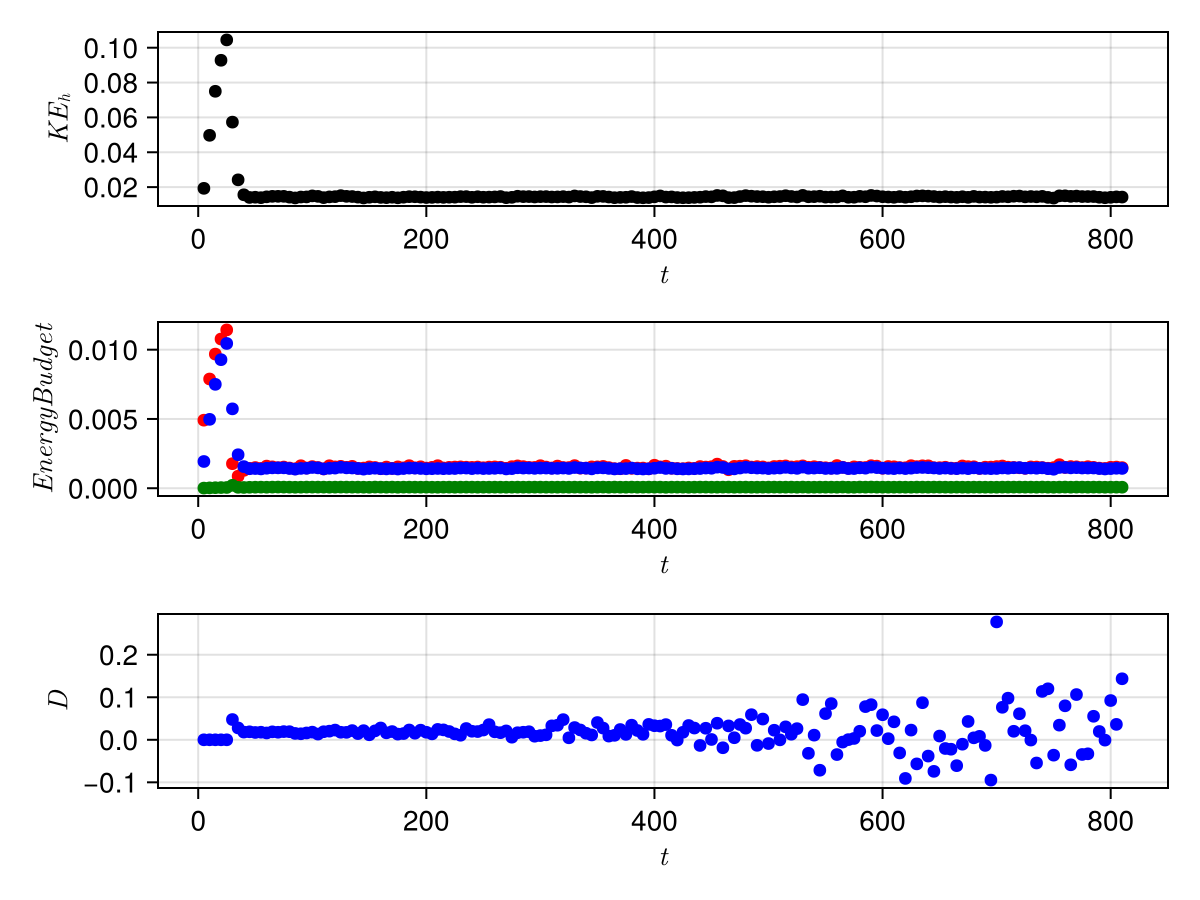

CairoMakie.Screen{IMAGE}


In [54]:
time = Float64[]
KEh = Float64[]
D = Float64[]
LSD = Float64[]
SSD = Float64[]
taums = Float64[]
inject = Float64[]

# Loop over Runs
for jj in 1:length(Run)
    DIR = readdir(joinpath(Dir, Run[jj]), join=true)
    S = readdlm(joinpath(Dir, Run[jj], "energy_bal.txt"))
    time = S[:, 1]'
    D = S[:, 9]'
    KEh = S[:, 2]'
    
    inject = S[:, 4]'
    SSD = S[:, 5]'
    LSD = S[:, 6]'

end


fig = Figure()
ax1 = Axis(fig[1, 1], 
xlabel = L"$t$", 
ylabel = L"$KE_h$")

plot!(ax1, Array(vec(time)), Array(vec(KEh)), color="black")

ax2 = Axis(fig[2, 1], 
xlabel = L"$t$", 
ylabel = L"Energy Budget")
plot!(ax2, Array(vec(time)), Array(vec(inject)), color="red")
plot!(ax2, Array(vec(time)), Array(vec(LSD)), color="blue")
plot!(ax2, Array(vec(time)), Array(vec(SSD)), color="green")
ax3 = Axis(fig[3, 1], 
xlabel = L"$t$", 
ylabel = L"$D$")
plot!(ax3, Array(vec(time)), Array(vec(D)), color="blue")

display(fig)

#### Check the energy spectra

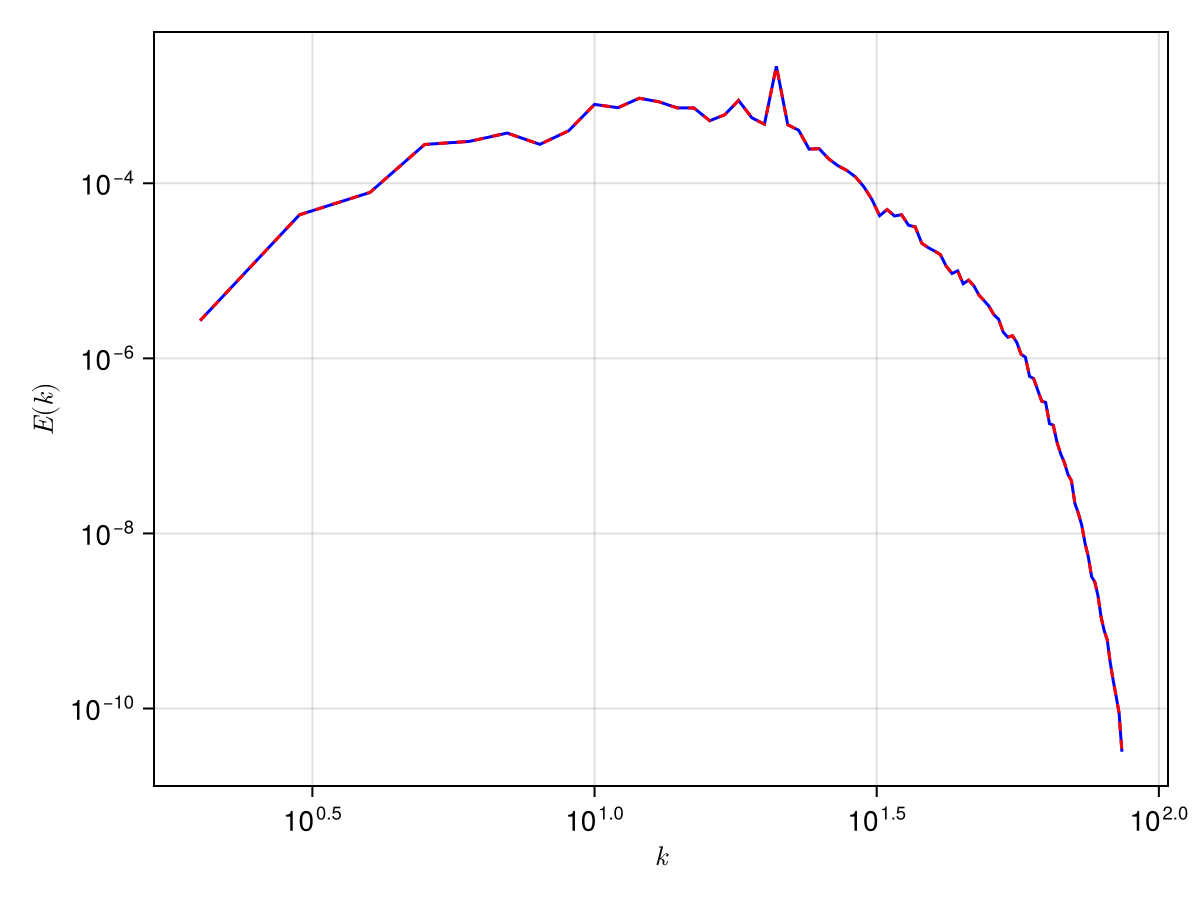

CairoMakie.Screen{IMAGE}


In [52]:
Nspectrum = 10
file = matread("../Fields/spectrum_ref_"* @sprintf("%03d", Nspectrum) * ".mat")

# Access variables stored in the file
Spref = file["rSpecveloc"]
kref = file["kmoy"]

file = matread("../Fields/spectrum_"* @sprintf("%03d", Nspectrum) * ".mat")
# Access variables stored in the file
Sp = file["rSpecveloc"]
k = file["kmoy"]

fig = Figure()
ax = Axis(fig[1,1],
xscale = log10,
yscale = log10,
xlabel = L"$k$", 
ylabel = L"$E(k)$")

lines!(ax, kref[Spref .> 0], Spref[Spref .> 0], color=:blue)
lines!(ax, k[Sp .> 0], Sp[Sp .> 0], color=:red, linestyle=:dash )
display(fig)
